In [857]:
import pandas as pd
xls = pd.ExcelFile("/Users/karan7798z/Documents/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx")
df_transactions = pd.read_excel(xls, sheet_name='Transactions')
df_demographics = pd.read_excel(xls, sheet_name='CustomerDemographic')
df_addresses = pd.read_excel(xls, sheet_name='CustomerAddress')
df_new_cust = pd.read_excel(xls, sheet_name='NewCustomerList')

In [858]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit_loss
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87


First we need to transform the demographics, address and new customer datasets.
We will be normalizing the demographics dataset's gender column to contain only one value per category

In [859]:
df_demographics['gender'].replace(['Female', 'Femal'], 'F', inplace=True)
df_demographics['gender'].replace('Male', 'M', inplace=True)

df_new_cust['gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)

In [860]:
df_demographics['gender'].value_counts()

F    2038
M    1872
U      87
Name: gender, dtype: int64

Similar adjustments need to be made in the Customer Address dataset's state column

In [861]:
df_addresses['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

Here New South Wales & NSW, as well as Victoria and VIC indicate the same states.
We'll normalize the column to contain one value for one state

In [862]:
df_addresses['state'].replace('Victoria', 'VIC', inplace=True)
df_addresses['state'].replace('New South Wales', 'NSW', inplace=True)

In [863]:
df_addresses['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [ ]:
df_postcodes = pd.read_csv("/Users/karan7798z/Documents/KPMG_Virtual_Internship/Task 2/australian_postcodes.csv")
df_postcodes.head()

In [ ]:
df_postcodes = df_postcodes[['postcode', 'locality']]

In [ ]:
df_address = pd.merge(df_addresses, df_postcodes, on='postcode')
df_address.head()

## Age-wise analysis

Now, we will create a new column in Demographics, which will indicate customer's age derived from the provided DOB.  This data will be used for our first analytic conclusion, which is based on age-groups of buyers.

In [864]:
now = pd.Timestamp('now')
df_demographics['age'] = (now - df_demographics['DOB']).astype('<m8[Y]')
df_new_cust['age'] = (now - df_new_cust['DOB']).astype('<m8[Y]')

df_demographics['age_range'] = pd.cut(df_demographics['age'], bins=5)

In [865]:
df_merged = pd.merge(df_transactions, df_demographics, on='customer_id')
df_merged.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_range
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,"(60.0, 74.0]"
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,"(60.0, 74.0]"
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,"(60.0, 74.0]"
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,"(60.0, 74.0]"
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,"(60.0, 74.0]"


Text(0.5, 1.0, 'Age distribution of old customers')

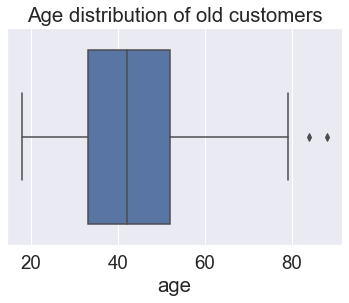

In [866]:
import seaborn as sns
#only checking for approved orders
sns.boxplot(x='age', data=df_demographics)
plt.title('Age distribution of old customers')

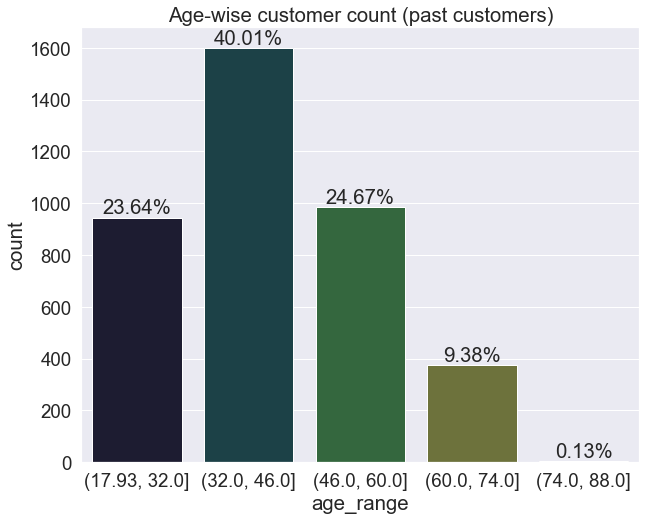

In [867]:
sns.set(font_scale=1.7)
plt.figure(figsize=(10,8))
g = sns.countplot(df_demographics['age_range'], palette=sns.color_palette("cubehelix", 8))
plt.title('Age-wise customer count (past customers)')
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100*y/len(df_demographics)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [868]:
df_agewise_counts = df_merged.groupby('age_range')['transaction_id'].count().reset_index(name='no_of_transactions')
df_agewise_counts.head()

,age_range,no_of_transactions
0,"(17.93, 32.0]",4682
1,"(32.0, 46.0]",7869
2,"(46.0, 60.0]",4769
3,"(60.0, 74.0]",1820
4,"(74.0, 88.0]",30


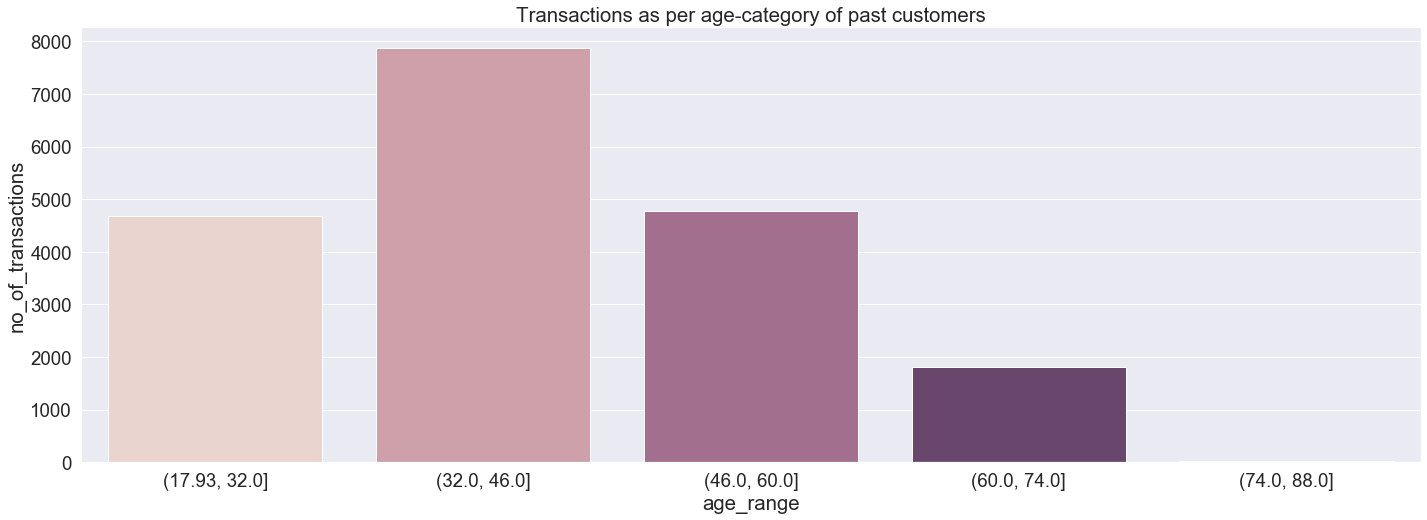

In [869]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,8))
sns.barplot(df_agewise_counts['age_range'], df_agewise_counts['no_of_transactions'], palette = sns.cubehelix_palette(len(df_agewise_counts['age_range'])))
plt.title('Transactions as per age-category of past customers')
plt.show()

So as a benchmark, customers between the age group of 30 - 49 have a high transaction count and we would be including this age group from amongst our new customers for highly focused marketing.

In [870]:
df_new_cust['age_range'] = pd.cut(df_new_cust['age'], bins=[17.93, 32.0, 46.0, 60.0, 74.0, 88.0])

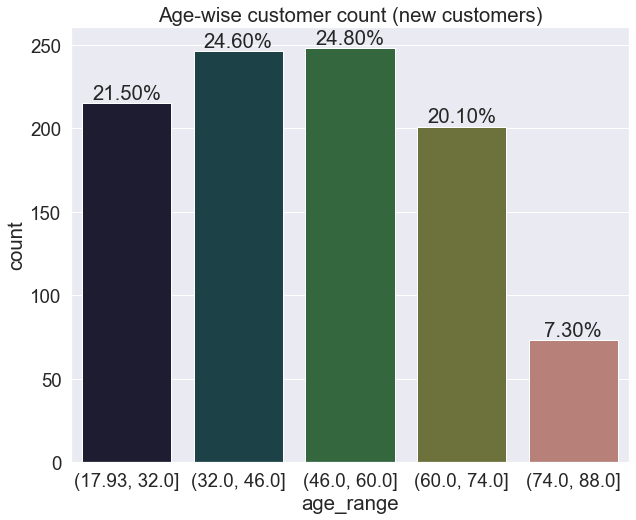

In [871]:
plt.figure(figsize=(10,8))
g = sns.countplot(df_new_cust['age_range'], palette=sns.color_palette("cubehelix", 8))
plt.title('Age-wise customer count (new customers)')
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100*y/len(df_new_cust)), (x.mean(), y), 
            ha='center', va='bottom')

## Gender-Wise Analysis

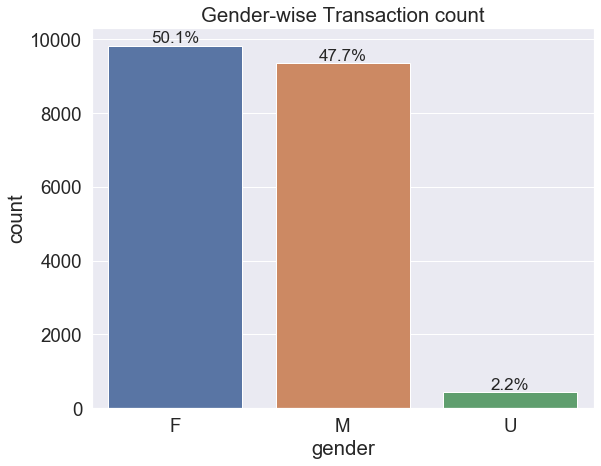

In [872]:
#Gender-wise transaction distribution in historical data
plt.figure(figsize=(9,7))
g = sns.countplot(df_merged['gender'])
plt.title('Gender-wise Transaction count')
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_merged)), (x.mean(), y), 
            ha='center', va='bottom', size='17')

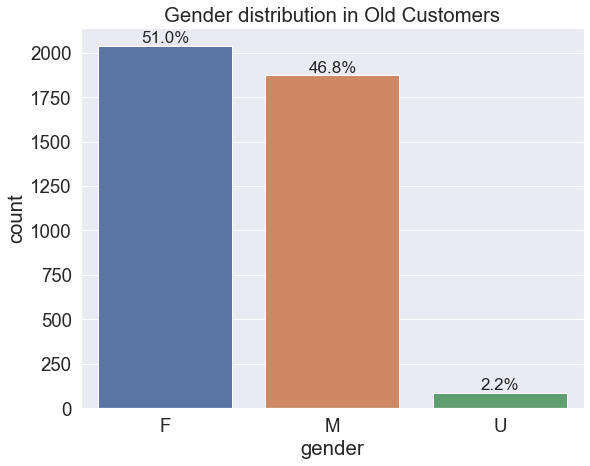

In [873]:
#Gender distribution amongst old customers
plt.figure(figsize=(9,7))
g = sns.countplot(df_demographics['gender'])
plt.title('Gender distribution in Old Customers')
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demographics)), (x.mean(), y), 
            ha='center', va='bottom', size='17')

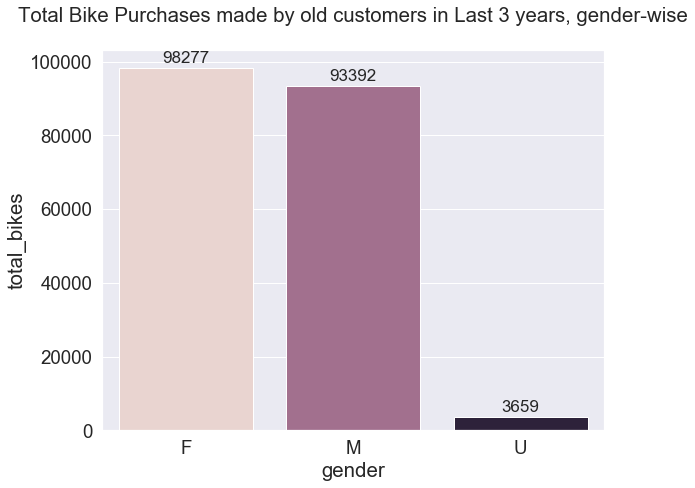

In [874]:
df_bike_pur_old = df_demographics.groupby('gender')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')
plt.figure(figsize=(9,7))
g = sns.barplot(df_bike_pur_old['gender'], df_bike_pur_old['total_bikes'], palette=sns.cubehelix_palette(len(df_bike_pur_old['gender'])))
plt.title('Total Bike Purchases made by old customers in Last 3 years, gender-wise\n')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

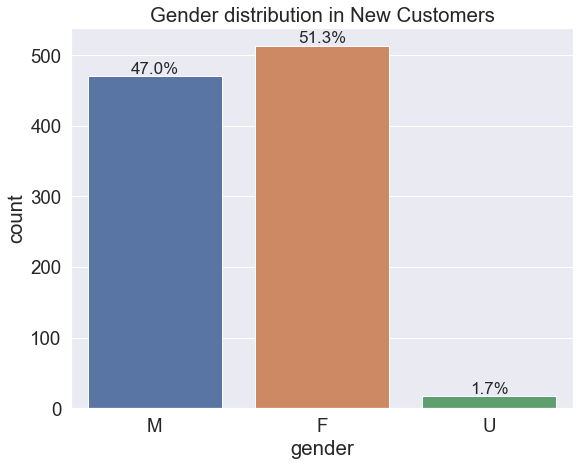

In [875]:
#Gender distribution amongst new customers
plt.figure(figsize=(9,7))
g = sns.countplot(df_new_cust['gender'])
plt.title('Gender distribution in New Customers')
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_new_cust)), (x.mean(), y), 
            ha='center', va='bottom', size='17')

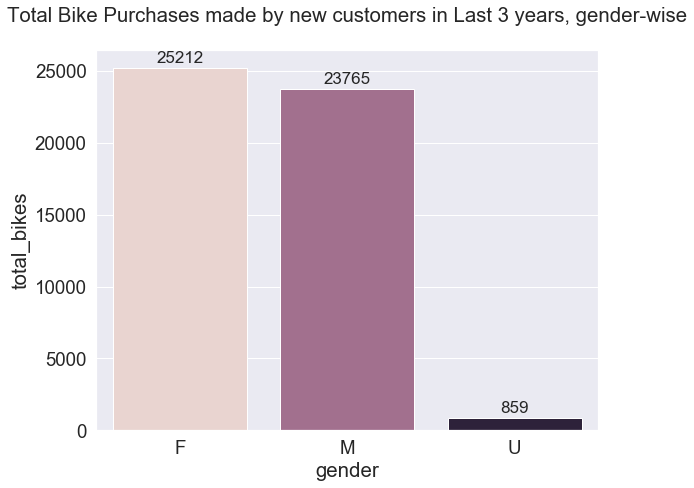

In [876]:
df_bike_pur = df_new_cust.groupby('gender')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')
plt.figure(figsize=(9,7))
g = sns.barplot(df_bike_pur['gender'], df_bike_pur['total_bikes'], palette = sns.cubehelix_palette(len(df_bike_pur['gender'])))
plt.title('Total Bike Purchases made by new customers in Last 3 years, gender-wise\n')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

Female customers have a higher transaction count, as well as form a larger user base for Sprockets than Male customers. Also amidst the new users, Female customers have the highest bike purchase record in the last 3 years. The U catgegorized customers are very less.

In [877]:
#wealth_segment, job_industry_category, owns_car, states, past_3_years_bike_related_purchases

## Wealth Segment Analysis

In [878]:
df_age_and_wealth = df_merged.groupby(['age_range', 'wealth_segment'])['transaction_id'].count().reset_index(name='no_of_transactions').sort_values(by=['no_of_transactions'], ascending=False)
df_age_and_wealth.head()

,age_range,wealth_segment,no_of_transactions
5,"(32.0, 46.0]",Mass Customer,3936
8,"(46.0, 60.0]",Mass Customer,2388
2,"(17.93, 32.0]",Mass Customer,2336
4,"(32.0, 46.0]",High Net Worth,2063
3,"(32.0, 46.0]",Affluent Customer,1870


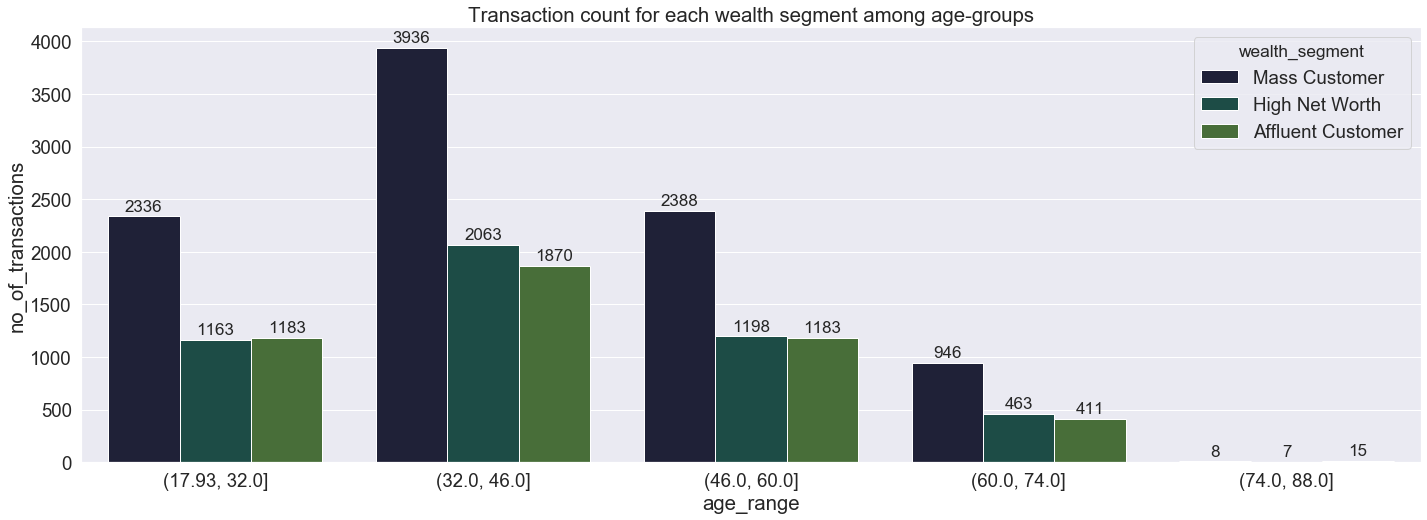

In [879]:
plt.figure(figsize=(24,8))
g = sns.barplot(df_age_and_wealth['age_range'], df_age_and_wealth['no_of_transactions'], hue=df_age_and_wealth['wealth_segment'], palette=sns.color_palette("cubehelix", 7))
plt.title('Transaction count for each wealth segment among age-groups')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

In [880]:
df_age_and_wealth_seg = df_demographics.groupby(['age_range', 'wealth_segment']).size().reset_index(name='no_of_customers').sort_values(by=['no_of_customers'], ascending=False)
df_age_and_wealth_seg

,age_range,wealth_segment,no_of_customers
5,"(32.0, 46.0]",Mass Customer,799
8,"(46.0, 60.0]",Mass Customer,487
2,"(17.93, 32.0]",Mass Customer,470
4,"(32.0, 46.0]",High Net Worth,414
3,"(32.0, 46.0]",Affluent Customer,386
6,"(46.0, 60.0]",Affluent Customer,255
7,"(46.0, 60.0]",High Net Worth,244
1,"(17.93, 32.0]",High Net Worth,240
0,"(17.93, 32.0]",Affluent Customer,235
11,"(60.0, 74.0]",Mass Customer,195


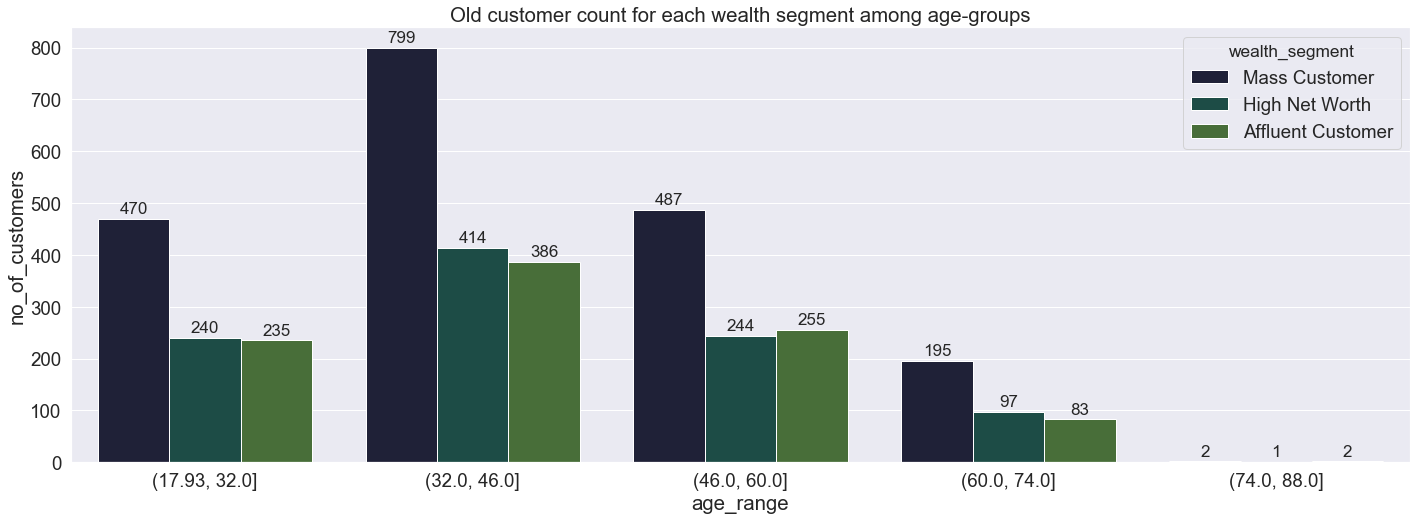

In [881]:
plt.figure(figsize=(24,8))
g = sns.barplot(df_age_and_wealth_seg['age_range'], df_age_and_wealth_seg['no_of_customers'], hue=df_age_and_wealth_seg['wealth_segment'], palette=sns.color_palette("cubehelix", 7))
plt.title('Old customer count for each wealth segment among age-groups')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

Thus, in all age groups, Mass Customer wealth segment has the transacted the most followed by the High Net Worth category. So our primary focus should be on Mass Customer Health segment of customers.

In [882]:
df_age_and_wealth_seg_new = df_new_cust.groupby(['age_range', 'wealth_segment']).size().reset_index(name='no_of_customers').sort_values(by=['no_of_customers'], ascending=False)
df_age_and_wealth_seg_new

,age_range,wealth_segment,no_of_customers
8,"(46.0, 60.0]",Mass Customer,134
5,"(32.0, 46.0]",Mass Customer,122
2,"(17.93, 32.0]",Mass Customer,103
11,"(60.0, 74.0]",Mass Customer,100
4,"(32.0, 46.0]",High Net Worth,64
3,"(32.0, 46.0]",Affluent Customer,60
7,"(46.0, 60.0]",High Net Worth,58
0,"(17.93, 32.0]",Affluent Customer,56
1,"(17.93, 32.0]",High Net Worth,56
6,"(46.0, 60.0]",Affluent Customer,56


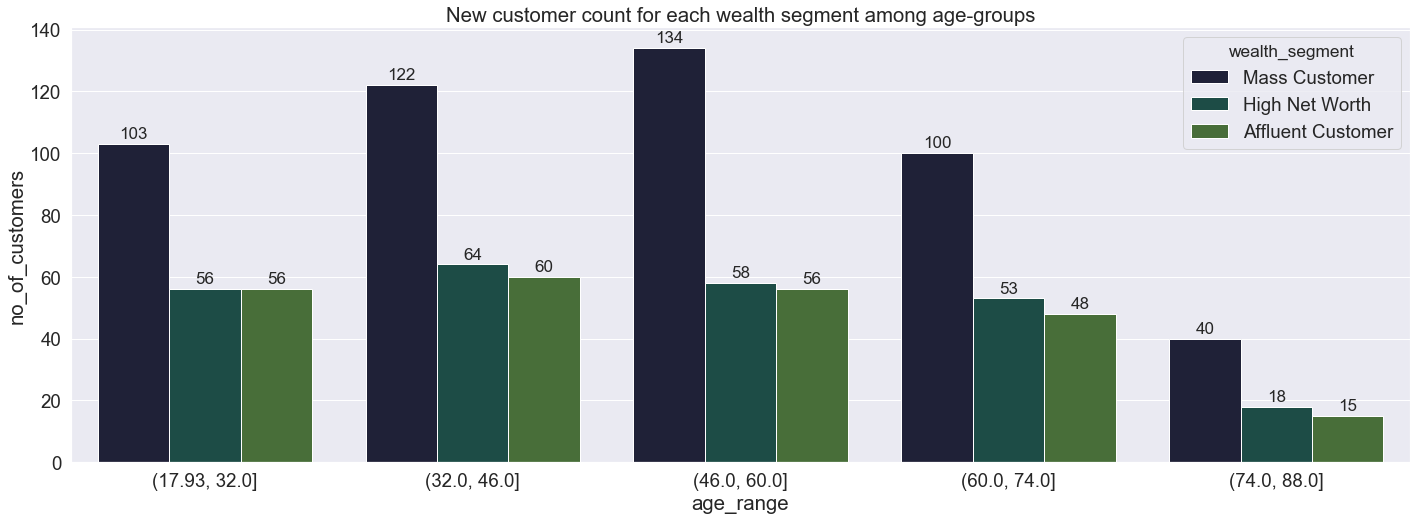

In [883]:
plt.figure(figsize=(24,8))
g = sns.barplot(df_age_and_wealth_seg_new['age_range'], df_age_and_wealth_seg_new['no_of_customers'], hue=df_age_and_wealth_seg_new['wealth_segment'], palette=sns.color_palette("cubehelix", 7))
plt.title('New customer count for each wealth segment among age-groups')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

## Job Industry Analysis

<Figure size 432x288 with 0 Axes>

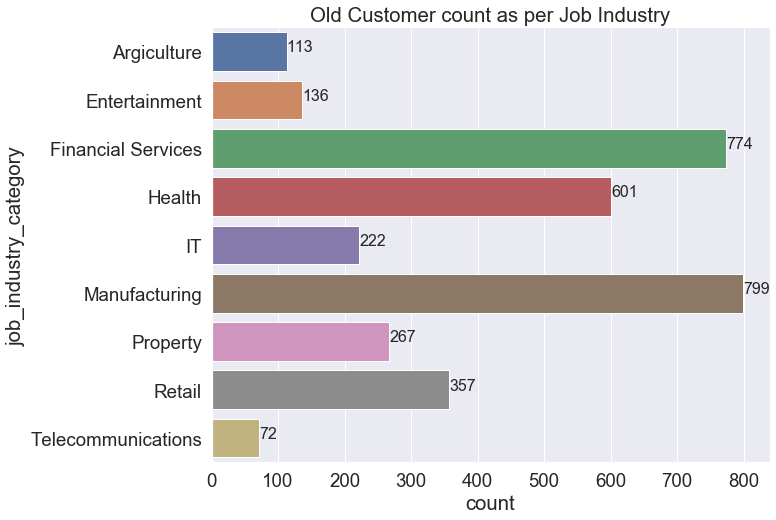

In [884]:
plt.figure()
plt.figure(figsize=(10,8))
g = sns.countplot(y=df_demographics['job_industry_category'].sort_values(ascending=True))
plt.title('Old Customer count as per Job Industry')
for p in g.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(value, (x, y), size=16)
plt.show()

<Figure size 432x288 with 0 Axes>

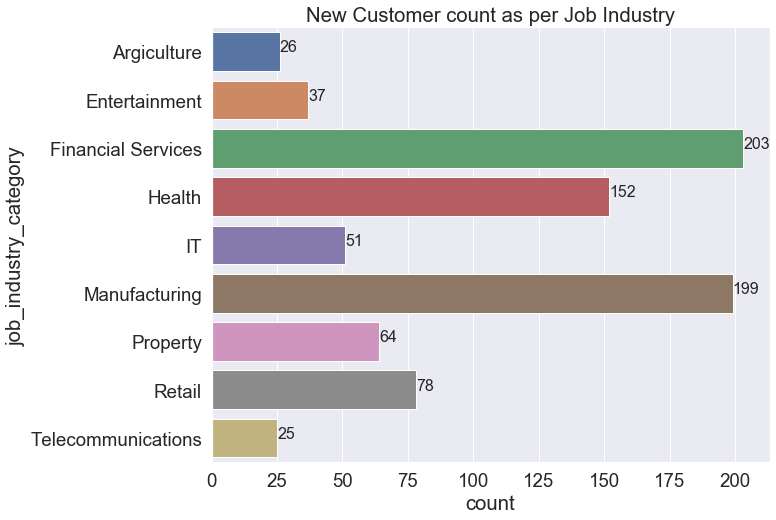

In [885]:
plt.figure()
plt.figure(figsize=(10,8))
g = sns.countplot(y=df_new_cust['job_industry_category'].sort_values(ascending=True))
plt.title('New Customer count as per Job Industry')
for p in g.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(value, (x, y), size=16)
plt.show()

## State-wise Analysis as per Car Ownership

In [886]:
df_merge1 = pd.merge(df_merged, df_addresses, on='customer_id', how='right')
df_merge2 = pd.merge(df_merged, df_addresses, on='customer_id')
print(df_merge1.shape)
print(df_merge2.shape)

(20090, 32)
(19580, 32)


In [887]:
df_merge1['state'].value_counts()

NSW    10732
VIC     5083
QLD     4275
Name: state, dtype: int64

In [888]:
df_transacted_custs = df_merge2.groupby('state')['customer_id'].nunique().reset_index(name='no_of_customers')
df_all_old_custs = df_merge1.groupby('state')['customer_id'].nunique().reset_index(name='no_of_customers')

df_transacted_custs['Type'] = "Customers who've transacted before"
df_all_old_custs['Type'] = 'Total Customers'

df_total_custs = pd.concat([df_transacted_custs, df_all_old_custs])
df_total_custs

,state,no_of_customers,Type
0,NSW,1864,Customers who've transacted before
1,QLD,742,Customers who've transacted before
2,VIC,880,Customers who've transacted before
0,NSW,2138,Total Customers
1,QLD,837,Total Customers
2,VIC,1021,Total Customers


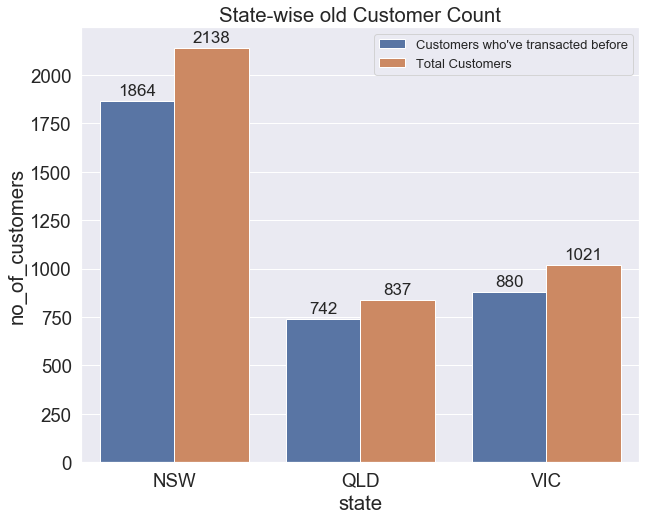

In [889]:
plt.figure(figsize=(10,8))
g = sns.barplot(df_total_custs['state'], df_total_custs['no_of_customers'], hue=df_total_custs['Type'])
plt.title('State-wise old Customer Count')
g.legend(fontsize=13)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

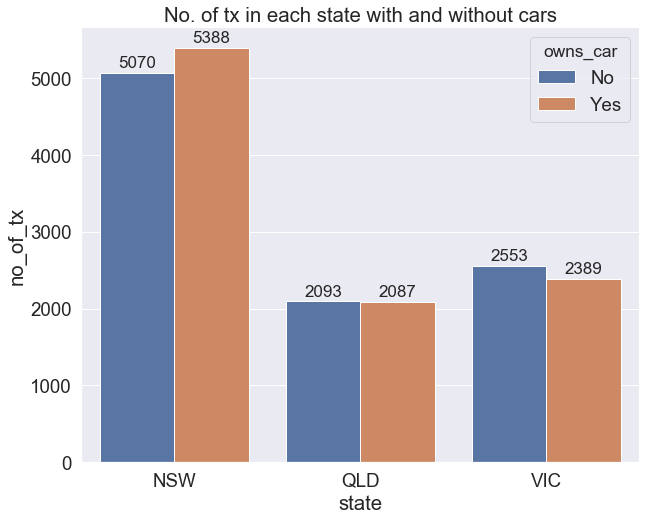

In [890]:
df_grouped = df_merge2.groupby(['state', 'owns_car'])['transaction_id'].count().reset_index(name='no_of_tx')

plt.figure(figsize=(10,8))
g = sns.barplot(df_grouped['state'], df_grouped['no_of_tx'], hue=df_grouped['owns_car'])
plt.title('No. of tx in each state with and without cars')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')